In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/bbc-text.csv')
df.columns



Index(['category', 'text'], dtype='object')

In [22]:
print(df)

           category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]


In [23]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [24]:
sinopsis = df_baru['text'].values
label = df_baru[['business',	'entertainment',	'politics',	'sport',	'tech']].values

In [25]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='<oov>')
tokenizer.fit_on_texts(sinopsis_latih) 
tokenizer.fit_on_texts(sinopsis_test)
 
sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)
 
padded_latih = pad_sequences(sekuens_latih,
                             padding='post',
                             maxlen=5,
                             truncating='post') 
padded_test = pad_sequences(sekuens_test,
                            padding='post',
                            maxlen=5,
                            truncating='post')

In [27]:
import tensorflow as tf
from keras import regularizers
from keras.layers import LSTM
from keras.layers import Bidirectional

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64),
    tf.keras.layers.Bidirectional(LSTM(64, dropout=0.5)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.00001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.00001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 64)          320000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                      

In [28]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
56/56 - 7s - loss: 1.6171 - accuracy: 0.2292 - val_loss: 1.6010 - val_accuracy: 0.2472 - 7s/epoch - 120ms/step
Epoch 2/30
56/56 - 1s - loss: 1.5037 - accuracy: 0.3545 - val_loss: 1.2459 - val_accuracy: 0.4449 - 778ms/epoch - 14ms/step
Epoch 3/30
56/56 - 1s - loss: 0.8298 - accuracy: 0.6792 - val_loss: 0.7528 - val_accuracy: 0.7528 - 758ms/epoch - 14ms/step
Epoch 4/30
56/56 - 1s - loss: 0.3444 - accuracy: 0.8871 - val_loss: 0.7234 - val_accuracy: 0.7865 - 803ms/epoch - 14ms/step
Epoch 5/30
56/56 - 1s - loss: 0.2121 - accuracy: 0.9337 - val_loss: 0.7069 - val_accuracy: 0.8112 - 757ms/epoch - 14ms/step
Epoch 6/30
56/56 - 1s - loss: 0.1197 - accuracy: 0.9697 - val_loss: 0.7900 - val_accuracy: 0.8157 - 777ms/epoch - 14ms/step
Epoch 7/30
56/56 - 1s - loss: 0.0964 - accuracy: 0.9753 - val_loss: 0.8300 - val_accuracy: 0.8112 - 773ms/epoch - 14ms/step
Epoch 8/30
56/56 - 1s - loss: 0.0867 - accuracy: 0.9747 - val_loss: 0.8429 - val_accuracy: 0.8000 - 814ms/epoch - 15ms/step
Epoch 9/30

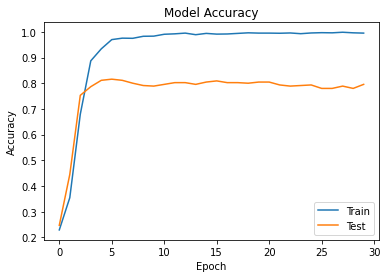

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='lower right')
plt.show()